### Classificação binária com um conjunto de dados de rotatividade bancária

A tarefa é prever se um cliente continua com sua conta ou a fecha (por exemplo, desligamentos).####Avali
ação
As submissões são avaliadas na área sob a curva ROC entre a probabilidade prevista e o alvo observado.

##### Arquivo de envio
Para cada ID no conjunto de teste, você deve prever a probabilidade da variável de destino Exited. O arquivo deve conter um cabeçalho e ter o seguinte 
formato:format:

```
id,Exited
165034,0.9
165035,0.1
165036,0.5
etc.
```

Link da competição do kaggle: https://www.kaggle.com/competitions/playground-series-s4e1/leaderboard

In [1]:
import os
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "bank_churn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Importando as bibliotecas

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

### Carregando os dados

In [3]:
csv_path = "database/train.csv"

df = pd.read_csv(csv_path)

### Overview dos dados

In [4]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
df.shape

(165034, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


- Não há registros nulos

#### Analisando registros duplicados

In [5]:
dups = df.duplicated()
dup_count = dups.sum()
print("Quantidade de duplicados: ",dup_count)

Quantidade de duplicados:  0


- Não há registros duplicados

#### Estatísticas gerais

In [6]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


##### Perguntas:

- Proporção de Exited
- Proporção de Ativos/Exited
- Boxplot da Age
- Distribuição do salário
- Distribuição do Geography

##### Removando colunas desnecessárias

In [7]:
df = df.drop(columns=['id', 'CustomerId','Surname'])

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


#### Analisando os dados

<Axes: xlabel='Exited', ylabel='percent'>

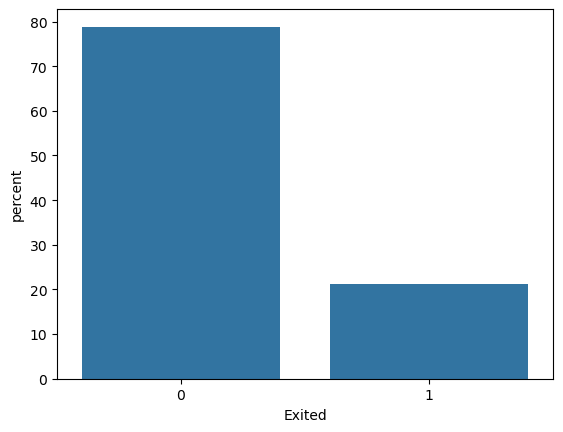

In [11]:
sns.countplot(df, x="Exited", stat="percent")

- Aproximadamente 80% dos clientes não deixaram o serviço do banco

In [12]:
df["Geography"].value_counts()

France     94215
Spain      36213
Germany    34606
Name: Geography, dtype: int64

<Axes: xlabel='Geography', ylabel='percent'>

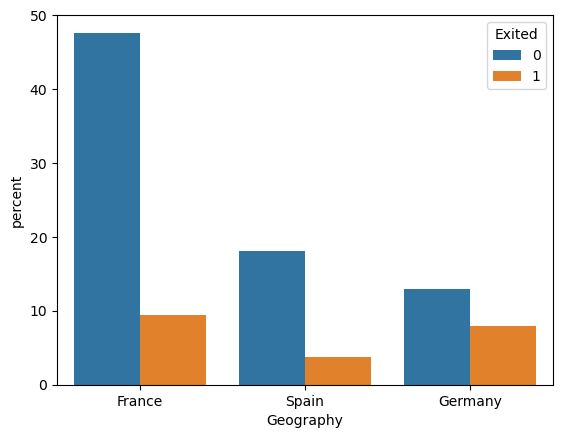

In [13]:
sns.countplot(df, x="Geography", hue="Exited", stat="percent")

<Axes: xlabel='Gender', ylabel='percent'>

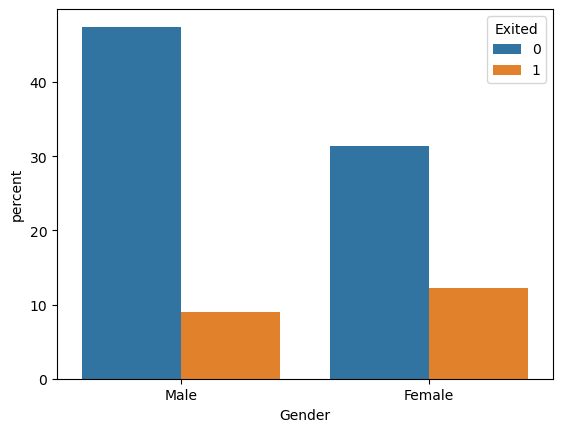

In [14]:
sns.countplot(df, x="Gender", hue="Exited", stat="percent")

- Aproximadamente 60% dos clientes são homens e 40% são mulheres
- Propocionalmente a média de mulheres que deixam o banco é maior que a de homens
- Poderíamos fazer um teste de hipótese se essa diferença é significativa

<Axes: xlabel='IsActiveMember', ylabel='EstimatedSalary'>

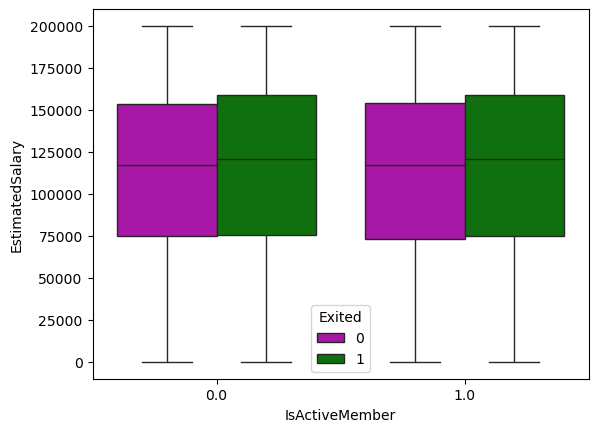

In [15]:
sns.boxplot(x="IsActiveMember", y="EstimatedSalary",
            hue="Exited", palette=["m", "g"],
            data=df)

- Aparentemente não há diferença do EstimatedSalary entre os grupos de clientes ativos e nãoa tivos
- Cabe um teste de hipótese?

<Axes: xlabel='IsActiveMember', ylabel='percent'>

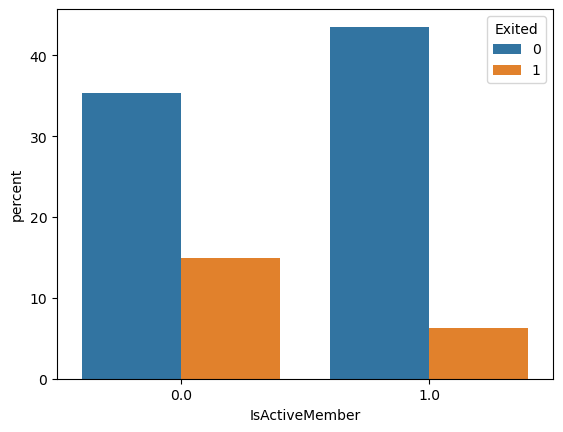

In [16]:
sns.countplot(df, x="IsActiveMember", hue="Exited", stat="percent")

- Membros ativos são menos prováveis de saírem do banco

<Axes: xlabel='Age', ylabel='Count'>

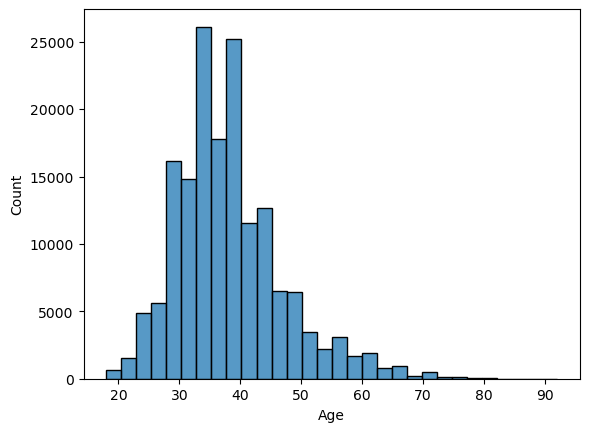

In [17]:
sns.histplot(data=df, x="Age",bins=30)

<Axes: >

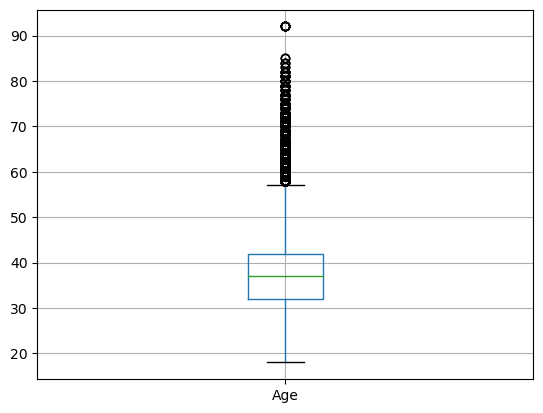

In [18]:
df.boxplot(column=['Age'])

- 50% dos clientes estão entre 32 e 42 anos
- Os outros 50% estão distribuídos em cliente de 18 a 32 anos e de 42 a 92 anos
- O Boxplot mostra valores como outliers, porém é totalmente normal terem clientes entre 60 e 92 anos
    - Podemos investigar se há clientes duplicados com informações diferentes, caso positivo, iremos remover da base

<Axes: xlabel='CreditScore', ylabel='Count'>

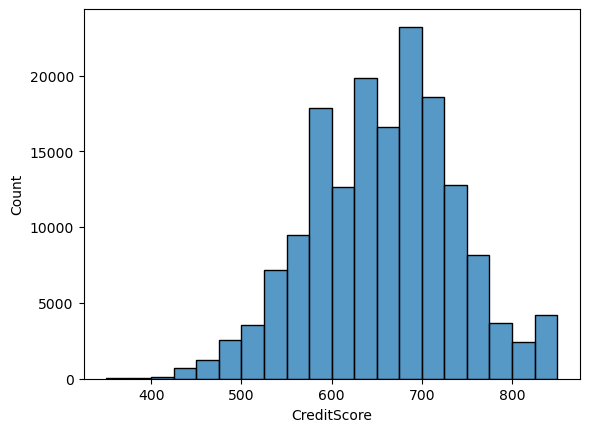

In [19]:
sns.histplot(data=df, x="CreditScore",bins=20)

- 50% dos clientes possuem CreditScore de 597 e 710

<Axes: xlabel='Balance', ylabel='Count'>

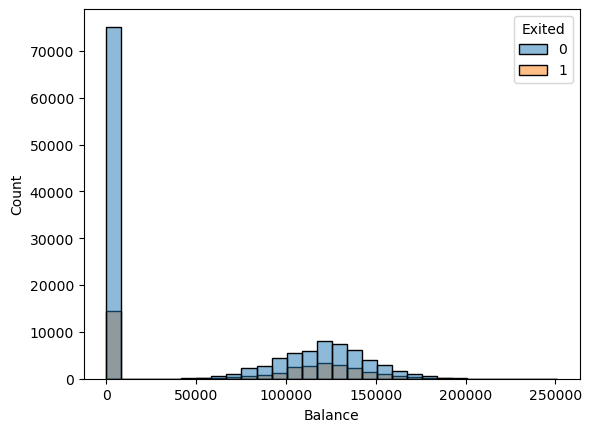

In [20]:
sns.histplot(data=df, x="Balance", hue="Exited", bins=30)

#### Calculando as proporções de clientes que saem do banco basedo no `Balance`

In [21]:
sum((df["Balance"] == 0))

89648

In [22]:
sum((df["Balance"] == 0) & (df["Exited"] == 1))

14492

In [23]:
sum((df["Balance"] != 0) & (df["Exited"] == 1))

20429

In [24]:
sum(df["Balance"] != 0)

75386

In [25]:
89648/(89648+75386)

0.5432092780881516

In [26]:
14492/(89648)

0.161654470819204

In [27]:
20429/75386

0.27099196137213805

- 54% dos clientes possuem balanco igual a 0, sendo que 16% saíram do banco
- Enquanto 46% dos clientes tem balanco maior que 0, e 27% deles saíram do banco
- A proporção de clientes com balanço **maior** que 0 que saem do banco foi **maior** que clientes com balanco igual a 0

<Axes: xlabel='Tenure', ylabel='percent'>

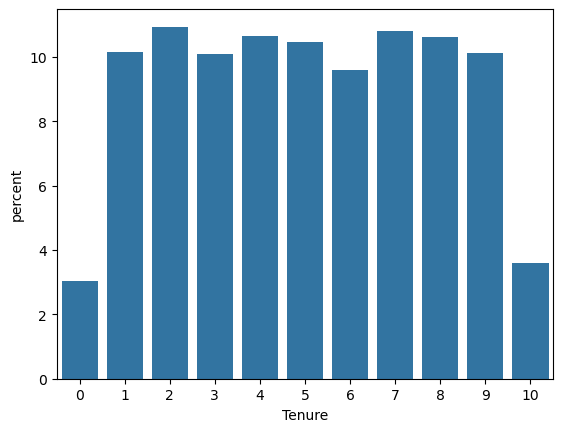

In [28]:
sns.countplot(df, x="Tenure", stat="percent")

- Aproximadamente 97% dos clientes possuem Tenure maior que 0

df.plot(kind="scatter", x="CreditScore", y="Balance", alpha=0.01)

- Há uma linha horizontal na posição do Balance igual a 0
    - Podemos verificar a porcentagem de pessoas que estão nesse intervalo
- Há uma linha vertical do CreditScore máximo
- É possível identificar várias linhas verticais mais claras correspondendo ao valores inteiro do CreditScore

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Age', ylabel='CreditScore'>

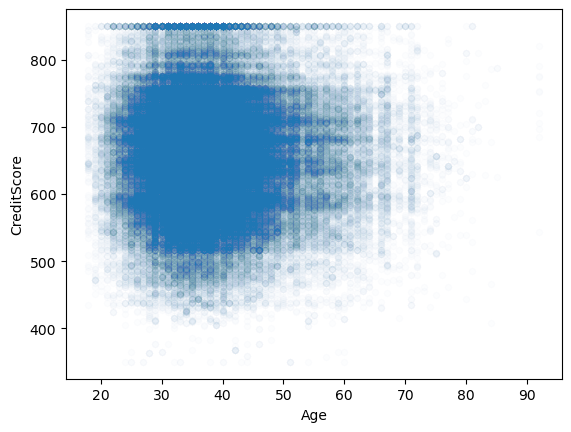

In [29]:
df.plot(kind="scatter", x="Age", y="CreditScore", alpha=0.01)

<Axes: xlabel='CreditScore', ylabel='Count'>

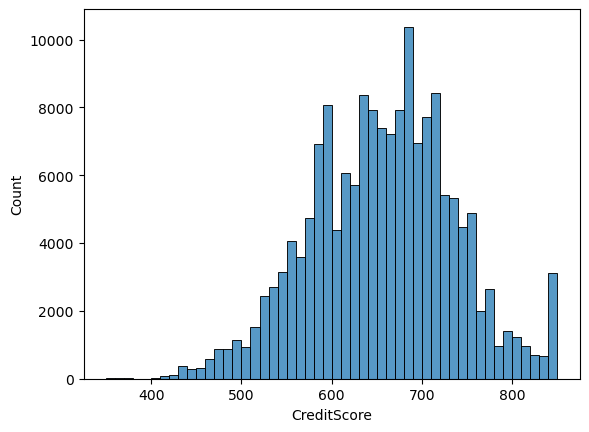

In [30]:
sns.histplot(data=df, x="CreditScore", bins=50)

- Pelos os atributos utilizados serem inteiro, há algumas linhas verticais e horizontais que se destacam. Dentre elas está a linha que corresponde ao CreditScore igual a 850 (valor máximo).
- Há uma menor concentração de clientes entre os scores 800 e 850

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Age', ylabel='Balance'>

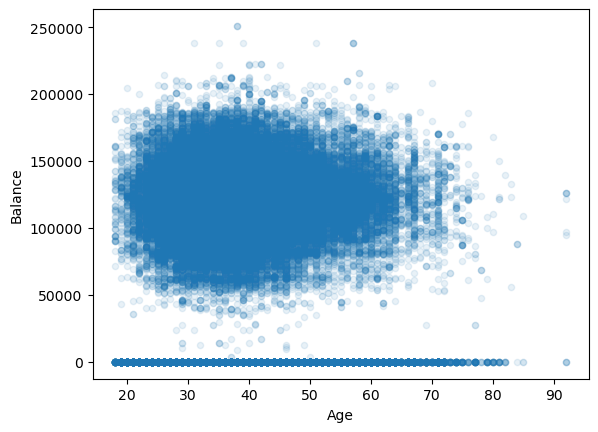

In [31]:
df.plot(kind="scatter", x="Age", y="Balance", alpha=0.1)

- O `Balance` se concentra mais entre 50000 e 180000
- Há uma concentração maior de clientes com o `Balance` igual a zero, esse gráfico mostra que isso ocorre para todas as idades até 82 anos

C:\Users\pedro\AppData\Roaming\Python\Python38\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


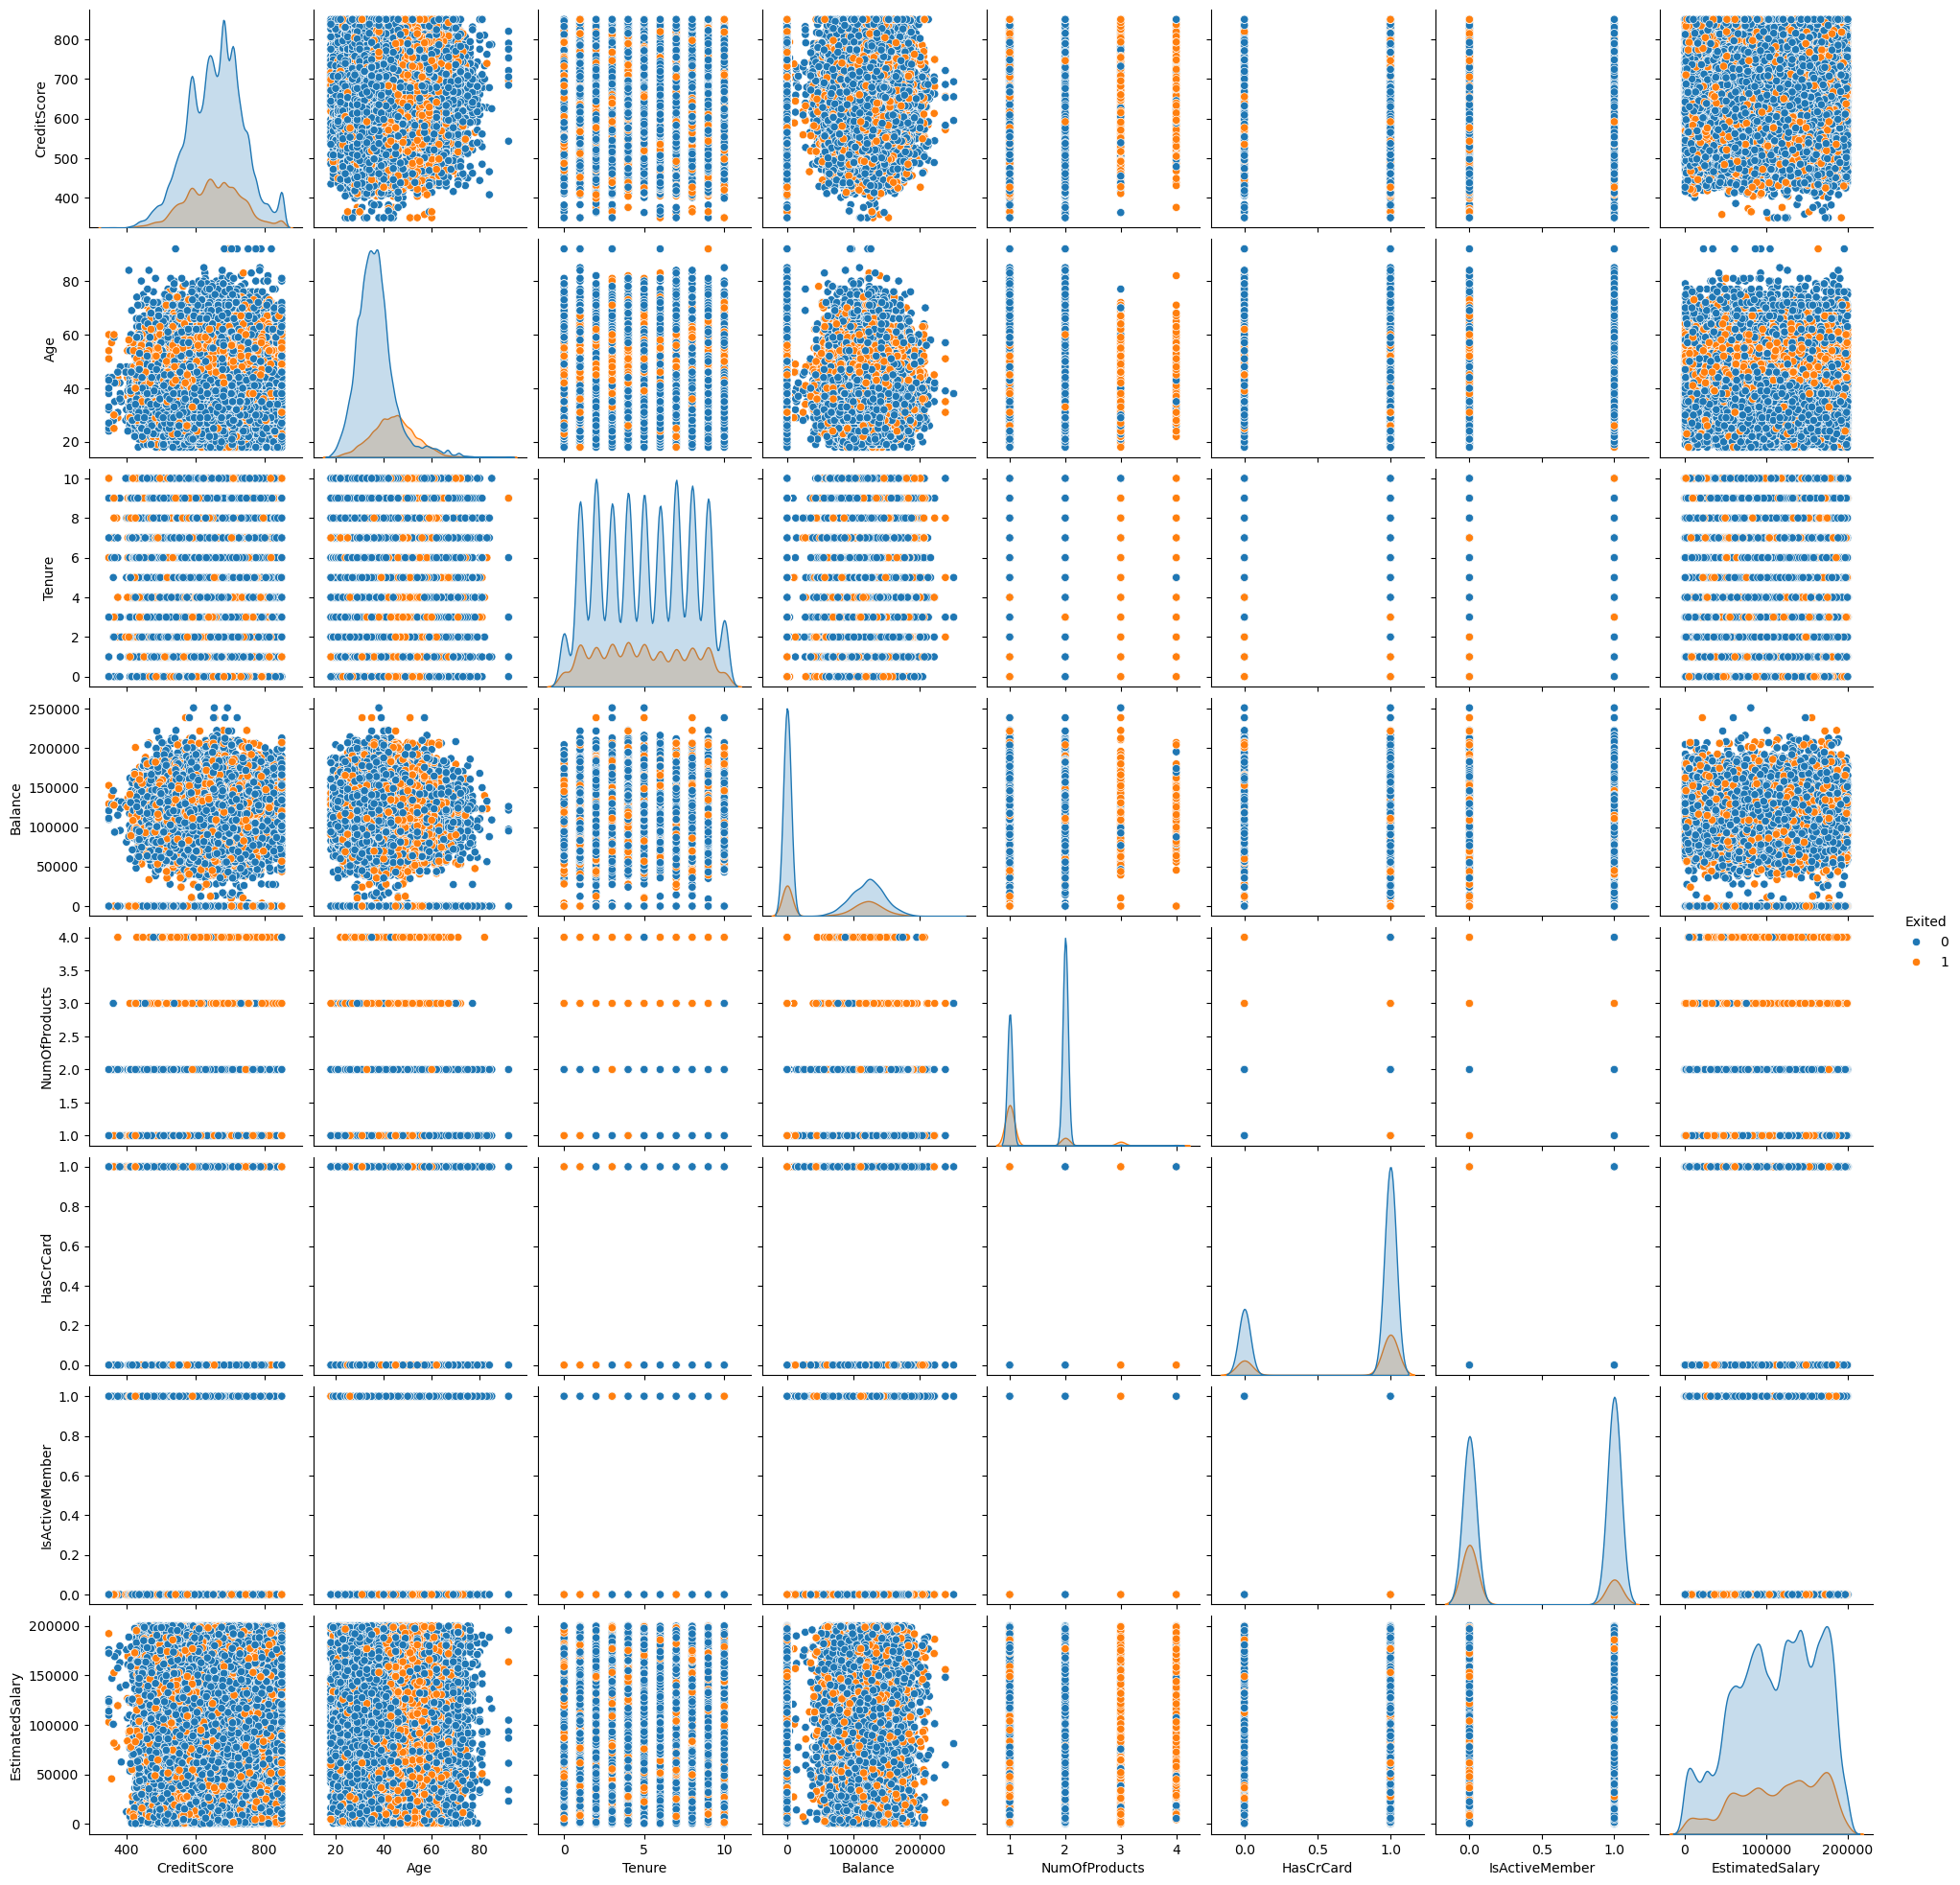

In [32]:
sns.pairplot(df,hue="Exited")

#### Notas

- Há uma faixa de idade de 40 a 60 anos que tendem a deixarem o serviço
    - Investigar com uma quantidade menor de dados pra visualizar melhor
- Cliente que assinam mais de 2 produtos tendem a deixarem o serviço

### Preparação dos dados

- Converter a coluna `Geography` para númerica
- Converter a coluna `Gender` para númerica
- Aplicar o Scaler nos atributos
- Qual(s) combinação de atributos pode ser realizada?

In [9]:
df_x_train = df.drop("Exited",axis=1)
df_y_train = df["Exited"]

In [10]:
df_x_train.shape

(165034, 10)

In [11]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#### Criando um pipeline

In [14]:
num_attribs = ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]
cat_attribs = ["Geography","Gender"]
oth_attribs = ["HasCrCard","IsActiveMember"]
all_columns = num_attribs + cat_attribs + oth_attribs

cat_pipeline = Pipeline([
    ("cat_encoder", OneHotEncoder(sparse=False,drop="if_binary")),
])

num_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

preprocess_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [104]:
X_train = preprocess_pipeline.fit_transform(
    df_x_train[num_attribs + cat_attribs + oth_attribs])
X_train

array([[ 0.14413459, -0.57807434, -0.71997339, ...,  0.        ,
         0.        ,  1.        ],
       [-0.36770579, -0.57807434, -1.43269365, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.2689737 ,  0.21135385,  1.77454751, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.14170832, -0.80362525, -0.00725313, ...,  0.        ,
         0.        ,  1.        ],
       [-1.27903135, -0.9164007 ,  0.70546712, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.41620652, -0.80362525, -1.43269365, ...,  0.        ,
         0.        ,  1.        ]])

In [40]:
y_train = df_y_train

### Modelagem

In [41]:
from sklearn.linear_model import SGDClassifier

In [42]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

#### Testando a classificação

In [43]:
X_train[1],y_train[1]

(array([-0.36770579, -0.57807434, -1.43269365, -0.8831633 ,  0.81429756,
        -1.25408471,  1.        ,  0.        ,  0.        ,  1.        ]),
 0)

In [44]:
sgd_clf.predict([X_train[1]])

array([0], dtype=int64)

In [45]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=5, scoring="accuracy")

array([0.78816615, 0.80446572, 0.78840852, 0.78843882, 0.80473247])

#### Avaliando a performance usando Validação Cruzada

#### SGDClassifier

In [46]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.7882937469704314
0.8049563742123121
0.8094401357246728
0.795079980610761
0.8070047870084227
0.7938556626067987
0.7918560261770587
0.7964612494697934
0.8131248863842938
0.7915530509604314


#### Matriz de confusão

In [47]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


In [48]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=skfolds)

In [49]:
confusion_matrix(y_train, y_train_pred)

array([[127988,   2125],
       [ 31020,   3901]], dtype=int64)

##### Notas

- Valor muito alto para o Falso Positivo
- Essa é uma base desbalanceada, uma estratégia para bases desbalanceadas é criar bases de treinamento estratificadas
- Tentar algoritmos diferentes
- Extrair/Criar novos atributos
- Como este modelo lidar com essa quantidade de dados de treinamento e atributos?

#### SGDClassifier - Predição de Probabilidade

In [50]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [51]:
y_sgd_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=skfolds,method="decision_function")

In [52]:
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_train, y_sgd_scores)

In [53]:
fpr_sgd, tpr_sgd, thresholds_sgd

(array([0.00000000e+00, 7.68562711e-06, 1.53712542e-05, ...,
        9.99984629e-01, 1.00000000e+00, 1.00000000e+00]),
 array([0.        , 0.        , 0.        , ..., 0.99988546, 0.99988546,
        1.        ]),
 array([ 3.08932387,  2.08932387,  1.77100449, ..., -3.19927086,
        -3.37954171, -3.77735657]))

In [54]:
precisions_sgd, recalls_sgd, thresholds_sgd = precision_recall_curve(y_train, y_sgd_scores)

#### RandomForest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
skfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [57]:
# Predição da probabildade de pertencer a cada classe
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=skfolds,
                                    method="predict_proba")

In [58]:
# Predição da classe
y_pred_forest = cross_val_predict(forest_clf, X_train, y_train, cv=skfolds,
                                    method="predict")

#### Matriz de Confusão - RandomForest

In [59]:
confusion_matrix(y_train, y_pred_forest)

array([[122250,   7863],
       [ 17288,  17633]], dtype=int64)

- O número de Falsos Negativos está muito alto, o valor é igual aos Verdadeiros Positivos
- Temos que buscar diminuir o valor de Falsos Negativos

In [60]:
y_scores_forest = y_probas_forest[:, 1]

In [61]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores_forest)

In [62]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([0, 1, 0, 1])             

Saving figure precision_recall_vs_threshold_plot


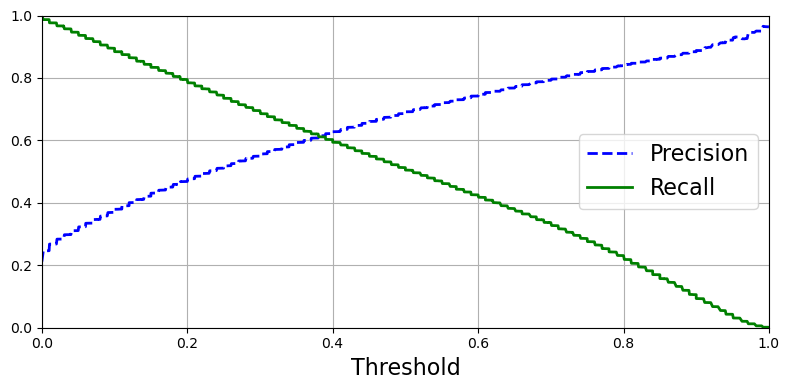

In [63]:
plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
save_fig("precision_recall_vs_threshold_plot")                                              # salva imagem
plt.show()

#### Ajustando threshold para diminuir `Recall`

##### Threshold = 0.5

In [64]:
confusion_matrix(y_train, y_pred_forest)

array([[122250,   7863],
       [ 17288,  17633]], dtype=int64)

##### Threshold = 0.4

In [65]:
y_pred_forest_th = [1 if th > 0.4 else 0 for th in y_scores_forest]
confusion_matrix(y_train, y_pred_forest_th)

array([[117811,  12302],
       [ 14180,  20741]], dtype=int64)

##### Threshold = 0.35

In [66]:
y_pred_forest_th = [1 if th > 0.35 else 0 for th in y_scores_forest]
confusion_matrix(y_train, y_pred_forest_th)

array([[114823,  15290],
       [ 12620,  22301]], dtype=int64)

##### Threshold = 0.3

In [67]:
y_pred_forest_th = [1 if th > 0.3 else 0 for th in y_scores_forest]
confusion_matrix(y_train, y_pred_forest_th)

array([[111026,  19087],
       [ 10979,  23942]], dtype=int64)

##### Notas

- A diminuição do threshold aumenta o `Recall`, porém diminui a `Precisão` e `Acurácia`
- No contexto do problema, o objetivo é identificar os clientes com mais probabilidade de fecharem a conta no banco
- Para o negócio, o maior risco é do falso negativo. Identificar o cliente como não vai fechar a conta mas o cliente o cliente fecha a conta no banco
- Considerando um threshhold de 0.5, por exemplo, o público que eu deveria me preocupar (TP + FP) é de 25.000 clientes, quando eu altero para 0.3, este público para a ser de  43.000 cliente. Há um aumento significativo no público que devo me preocupar.
- Outro ponto é que quase 50% dos clientes do público que estou marcando que possuem probabilidade de fecharem a conta, na realidade não vão, e irei ter um custo desnecessários.
- Quais os custos e risco envolvidos neste processo de manter o cliente?
- Os resultados ainda estão bem ruins, o ideal é refinar mais o processo.

#### Área Sob a Curva ROC

In [53]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)    

In [69]:
y_scores_forest = y_probas_forest[:, 1] # score = probabilidade da classe positiva
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_scores_forest)

Saving figure roc_curve_comparison_plot


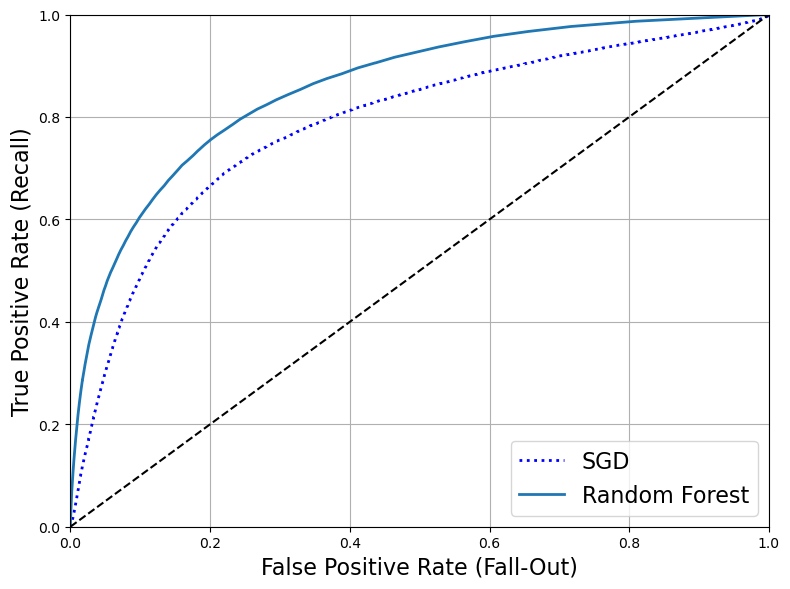

In [70]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_sgd, tpr_sgd, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

- Random Forest mostra um desempenho melhor que o SGDClassifier

In [71]:
confusion_matrix(y_train, y_train_pred)

array([[127988,   2125],
       [ 31020,   3901]], dtype=int64)

In [72]:
confusion_matrix(y_train, y_pred_forest)

array([[122250,   7863],
       [ 17288,  17633]], dtype=int64)

In [73]:
print("Área sob a curva SGDClassifier", roc_auc_score(y_train, y_train_pred))
print("Área sob a curva RandomForest", roc_auc_score(y_train, y_pred_forest))
print("Área sob a curva RandomForest (Threshold = 0.3)", roc_auc_score(y_train, y_pred_forest_th))

Área sob a curva SGDClassifier 0.5476886645347792
Área sob a curva RandomForest 0.7222538175643403
Área sob a curva RandomForest (Threshold = 0.3) 0.76945454293612


### Feature Engineer

In [35]:
X_train = df.drop("Exited",axis=1)
y_train = df["Exited"]

In [30]:
df_x_train.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

#### Criação de novos atributos

- `IsSenior`: identifica se cliente possui mais de 60 anos
- `IsActive_by_CreditCard`: identifica se cliente é ativo e possui cartão de crédito
- `Products_Per_Tenure`: proporção de `Tenue` por produto assinado
- `AgeCat`: cria mais uma coluna de acordo com faixas de idade do cliente
- Avaliar criar sinalizadores binários indicando se o salário está dentro de uma determinada faixa
- Avaliar criar sinalizadores binários indicando se o saldo é zero ou não

In [40]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.base import BaseEstimator, TransformerMixin

In [33]:
skfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [74]:
X_train = df.drop(["Exited"],axis=1)
y_train = df["Exited"]

In [76]:
X_train.shape

(165034, 10)

In [102]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust other parameters as needed

#forest_clf = RandomForestClassifier(n_estimators=100, random_state=42, predict_proba=True)

#### Criando Pipeline

In [60]:
# Define a custom transformer
class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, some_parameter):
        self.some_parameter = some_parameter
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X['IsSenior'] = X['Age'].apply(lambda x: 1 if x >= 60 else 0)
        X['IsActive_by_CreditCard'] = X['HasCrCard'] * X['IsActiveMember']  
        X['Products_Per_Tenure'] =  X['Tenure'] / X['NumOfProducts']  
        X['AgeCat'] = np.round(X.Age/20).astype('int').astype('category')
        
        return X

# Define transformations for different columns
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])

# Include the custom transformer for a specific column
custom_features = ['Age','HasCrCard','IsActiveMember','Tenure','NumOfProducts']
custom_transformer = Pipeline(steps=[
    ('custom', CustomTransformer(some_parameter='some_value'))])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('custom', custom_transformer, custom_features)])  # Include the custom transformer here

# Define the pipeline with the preprocessor and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', forest_clf)])

# Assuming X_train and y_train are your training data
# Perform cross-validated prediction

# Now you can use the predicted values for evaluation or further analysis


In [ ]:
predicted = cross_val_predict(pipeline, X_train, y_train, cv=skfolds, method="predict_proba")

In [46]:
y_pred_forest_th = [1 if th > 0.5 else 0 for th in predicted[:, 1]]
confusion_matrix(y_train, y_pred_forest_th)

array([[122193,   7920],
       [ 16097,  18824]], dtype=int64)

In [50]:
y_pred_forest_th = [1 if th > 0.3 else 0 for th in predicted[:, 1]]
confusion_matrix(y_train, y_pred_forest_th)

array([[111724,  18389],
       [ 10417,  24504]], dtype=int64)

In [51]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,predicted[:, 1])

#### ROC AUC

In [55]:
print("Área sob a curva RandomForest V2 (Threshold = 0.3)", roc_auc_score(y_train, y_pred_forest_th))

Área sob a curva RandomForest V2 (Threshold = 0.3) 0.7801835608539429


##### Notas

- A inclusão de novos atributos melhorou o desempenho do RandomForest que possuia uma área sob a curva roc de 0.76 enquanto esta última versão possui 0.78

### Aplicando o modelo RandomForest na base de teste

##### Carregando a base de teste

In [77]:
csv_path = "database/test.csv"

X_test = pd.read_csv(csv_path)
X_test = X_test.drop(columns=['id', 'CustomerId','Surname'])

In [94]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Geography', 'Gender',
                                                   'HasCrCard',
                                                   'IsActiveMember']),
                              

In [99]:
predictions_prob = pipeline.predict_proba(X_test)

In [103]:
predictions_prob[:, 1]

array([0.08, 0.93, 0.  , ..., 0.  , 0.06, 0.2 ])

#### Gerando o arquivo para submeter no kaggle

In [106]:
df_output = pd.read_csv(csv_path)

In [108]:
df_output["Exited"] = predictions_prob[:, 1]

In [109]:
df_output.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75,0.08
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27,0.93
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09,0.00
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57,0.06
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00,0.23


In [110]:
df_output[["id","Exited"]].head()

,id,Exited
0,165034,0.08
1,165035,0.93
2,165036,0.00
3,165037,0.06
4,165038,0.23


In [8]:
df_output[["id","Exited"]].to_csv('./outputs/predicitons_proba_random_forest.csv', index=False)

NameError: name 'df_output' is not defined

#### Resultado da Submissão

![Score_RandomFores](images/bank_churn/kaggle_score_random_forest.png)


### Próximos passos

- Avaliar criação de novos atributos (marcação de salário mínimo e flag se tem saldo)
- Aplicar XGBoost
- Aplicar Gridsearch
- Salvar modelo com picket

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.base import BaseEstimator, TransformerMixin

#### Carregando o arquivo de treino

In [3]:
csv_path = "database/train.csv"
df = pd.read_csv(csv_path)
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


#### Carregando arquivo de teste

In [66]:
csv_path = "database/test.csv"

X_test = pd.read_csv(csv_path)
X_test = X_test.drop(columns=['id', 'CustomerId','Surname'])
X_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


#### Removando colunas

In [4]:
df = df.drop(columns=['id', 'CustomerId','Surname'])

X_train = df.drop("Exited",axis=1)
y_train = df["Exited"]

#### Atributos criados anteriormente

In [34]:
class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X['IsSenior'] = X['Age'].apply(lambda x: 1 if x >= 60 else 0)
        X['IsActive_by_CreditCard'] = X['HasCrCard'] * X['IsActiveMember']  
        X['Products_Per_Tenure'] =  X['Tenure'] / X['NumOfProducts']  
        X['AgeCat'] = np.round(X.Age/20).astype('int').astype('category')
        
        return X

numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))])

custom_features = ['Age','HasCrCard','IsActiveMember','Tenure','NumOfProducts']
custom_transformer = Pipeline(steps=[
    ('custom', CustomTransformer())])

#### Novo Atributo Marcação Ganhos Acima do Salário Mínimo

In [6]:
from sklearn.base import BaseEstimator, TransformerMixin

class SalaryFlagTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, country_salary_mapping):
        self.country_salary_mapping = country_salary_mapping
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        X_transformed['FlagSalaryHigher'] = X_transformed.apply(lambda row: 1 if row['Geography'] in self.country_salary_mapping and row['EstimatedSalary'] < self.country_salary_mapping[row['Geography']] else 0, axis=1)
        
        return X_transformed


In [10]:
from sklearn.pipeline import Pipeline

# Criação de um map com os salários anuais
country_salary_mapping = {'France': 1539.42 * 12, 'Germany': 1584 * 12, 'Spain': 1050 * 12}

salary_flag_features = ["Geography","EstimatedSalary"]

# Create the pipeline with the custom transformer
salary_flag_pipeline = Pipeline([
    ('salary_flag', SalaryFlagTransformer(country_salary_mapping))
])

# Fit and transform your data using the pipeline
# X_transformed = pipeline.fit_transform(X_train)

##### Quantidade de clientes que ganham acima do salário mínimo do seu país.

In [14]:
salary_flag_pipeline.fit_transform(X_train)["FlagSalaryHigher"].value_counts()

0    157919
1      7115
Name: FlagSalaryHigher, dtype: int64

In [15]:
salary_flag_pipeline.fit_transform(X_train).groupby(['Geography'])['FlagSalaryHigher'].value_counts()

Geography  FlagSalaryHigher
France     0                   89914
           1                    4301
Germany    0                   33156
           1                    1450
Spain      0                   34849
           1                    1364
Name: FlagSalaryHigher, dtype: int64

##### Notas

- Foi criado um map com os salários anuais de cada país baseado numa busca de salário médio no Google na data de 13/02/2024

#### Novo atributo `Balance` maior que zero

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

class BalanceHigherZeroTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        X_transformed['FlagBalanceHigher'] = X_transformed.apply(lambda row: 1 if row['Balance'] > 0 else 0, axis=1)
        
        return X_transformed


In [17]:
balance_flag_features = ["Balance"]
balance_flag_pipeline = Pipeline([
    ('balance_flag', BalanceHigherZeroTransformer())
])

# Fit and transform your data using the pipeline
X_transformed = balance_flag_pipeline.fit_transform(X_train)

In [18]:
X_transformed.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,FlagBalanceHigher
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,1
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


#### Unindo todas as transformações

In [51]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('custom', custom_transformer, custom_features),
        ('salary_flag_pipeline',salary_flag_pipeline, salary_flag_features),
        ('balance_flag_pipeline',balance_flag_pipeline, balance_flag_features)
    ],remainder='passthrough')


In [52]:
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

X_transformed = pipeline.fit_transform(X_train)

In [54]:
pipeline.named_steps['preprocessor'].transformers_[0][2]

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [55]:
pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].categories_

[array(['France', 'Germany', 'Spain'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array([0., 1.]),
 array([0., 1.])]

In [23]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83


In [59]:
X_transformed.shape

(165034, 25)

In [60]:
X_transformed_remains = np.delete(X_transformed, [20, 21, 23], axis=1)

In [61]:
X_transformed_remains.shape

(165034, 22)

In [62]:
pd.set_option('display.max_columns', None)

pd.DataFrame(X_transformed_remains).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.144135,-0.578074,-0.719973,-0.883163,0.814298,1.369486,0.0,0.0,1.0,1.0,0.0,33.0,1.0,0.0,3.0,2.0,0.0,0.0,1.5,2.0,0,0.0
1,-0.367706,-0.578074,-1.432694,-0.883163,0.814298,-1.254085,0.0,0.0,1.0,1.0,1.0,33.0,1.0,1.0,1.0,2.0,0.0,1.0,0.5,2.0,0,0.0
2,0.268974,0.211354,1.774548,-0.883163,0.814298,1.437422,0.0,0.0,1.0,1.0,0.0,40.0,1.0,0.0,10.0,2.0,0.0,0.0,5.0,2.0,0,0.0
3,-0.941966,-0.465299,-1.076334,1.486918,-1.013348,-0.557018,0.0,0.0,1.0,1.0,1.0,34.0,1.0,1.0,2.0,1.0,0.0,1.0,2.0,2.0,0,1.0
4,0.743362,-0.578074,-0.007253,-0.883163,0.814298,-1.93877,0.0,1.0,1.0,1.0,1.0,33.0,1.0,1.0,5.0,2.0,0.0,1.0,2.5,2.0,0,0.0


#### Validação Cruzada

In [63]:
skfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#### XGBoostClassifier

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Assuming you have your data loaded into X_train and y_train

# Define the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False)

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],  # learning rate
    'max_depth': [3, 4, 5],  # maximum depth of a tree
    'n_estimators': [100, 200, 300],  # number of trees to fit
    'subsample': [0.8, 0.9, 1.0],  # subsample ratio of the training instances
    'colsample_bytree': [0.8, 0.9, 1.0],  # subsample ratio of columns when constructing each tree
}


# Perform grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=skfolds, scoring='f1')
grid_search.fit(X_transformed_remains, y_train)

# Print the best parameters found
print("Best parameters found:", grid_search.best_params_)

# Get the best model
best_xgb_model = grid_search.best_estimator_

[22:13:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:14:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:14:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:14:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [67]:
X_transformed = pipeline.fit_transform(X_test)

In [68]:
X_transformed_test = np.delete(X_transformed, [20, 21, 23], axis=1)

In [69]:
X_transformed_test.shape

(110023, 22)

In [ ]:
y_pred_test = best_model.predict(X_transformed_test)

In [70]:
# Optionally, you can evaluate the best model on the test set
accuracy = best_xgb_model.score(X_transformed_test, y_test)
print("Accuracy on test set:", accuracy)


NameError: name 'y_test' is not defined

In [ ]:
X_transformed